In [3]:
# Load Data
import seaborn as sns
import numpy as np
import pandas as pd
from scripts import project_functions
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid")
df = project_functions.load_and_process()
df.head()

,date,open,volume_usdt,trade_count,volume_asset,asset_coin,base_coin,avg_trade_asset,avg_trade_usdt,delta_value,delta_range
0,2021-01-13,0.000353,8.631707e+03,90.0,2.451996e+07,BTT,USDT,272444.022222,95.907850,-0.001134,0.000003
1,2021-01-12,0.000351,3.011956e+06,20031.0,8.455808e+09,BTT,USDT,422136.113225,150.364721,0.005990,0.000036
2,2021-01-11,0.000429,4.024436e+06,25602.0,1.139497e+10,BTT,USDT,445081.251621,157.192270,-0.185797,0.000117
3,2021-01-10,0.000409,7.137798e+06,41729.0,1.744114e+10,BTT,USDT,417962.006854,171.051263,0.047375,0.000088
4,2021-01-09,0.000332,2.381440e+07,105684.0,5.561435e+10,BTT,USDT,526232.435752,225.335876,0.234549,0.000203


# Exploratory Data Analysis

In [4]:
unique = df["asset_coin"].unique()
print(f"Columns: {df.columns}")
print(f"Shape: {df.shape}")
print(f"Coins: {unique}")

Columns: Index(['date', 'open', 'volume_usdt', 'trade_count', 'volume_asset',
       'asset_coin', 'base_coin', 'avg_trade_asset', 'avg_trade_usdt',
       'delta_value', 'delta_range'],
      dtype='object')
Shape: (16142, 11)
Coins: ['BTT' 'BTC' 'TRX' 'XRP' 'ETC' 'XMR' 'XLM' 'NEO' 'EOS' 'ETH' 'QTUM' 'ZEC'
 'DASH' 'ADA' 'LINK' 'BNB' 'LTC']


In [5]:
df.describe()

,open,volume_usdt,trade_count,volume_asset,avg_trade_asset,avg_trade_usdt,delta_value,delta_range
count,16142.000000,1.614200e+04,1.588900e+04,1.614200e+04,1.588900e+04,15889.000000,16142.000000,16142.000000
mean,726.626494,6.812081e+07,9.871544e+04,6.825467e+08,3.063472e+04,428.170706,0.001778,47.729857
std,2668.447811,2.265147e+08,1.961775e+05,4.191326e+09,1.701418e+05,259.037562,0.056012,241.692168
min,0.000178,8.631707e+03,9.000000e+01,-9.142514e+10,-7.551514e+05,24.207066,-0.477836,0.000003
25%,0.291268,4.764626e+06,1.744200e+04,1.864495e+05,4.257051e+00,260.330259,-0.023767,0.019693
50%,8.680400,1.408930e+07,3.908400e+04,1.286585e+06,4.531228e+01,361.763730,0.000376,0.582800
75%,70.510000,4.306359e+07,9.431100e+04,4.393539e+07,1.538738e+03,510.068365,0.025584,4.715800
max,40586.960000,8.426880e+09,4.431451e+06,8.952526e+10,3.194355e+06,2719.562607,0.779800,7844.740000


<AxesSubplot:title={'center':'Daily Volume of USDT for Each Coin'}, xlabel='date', ylabel='volume_usdt'>

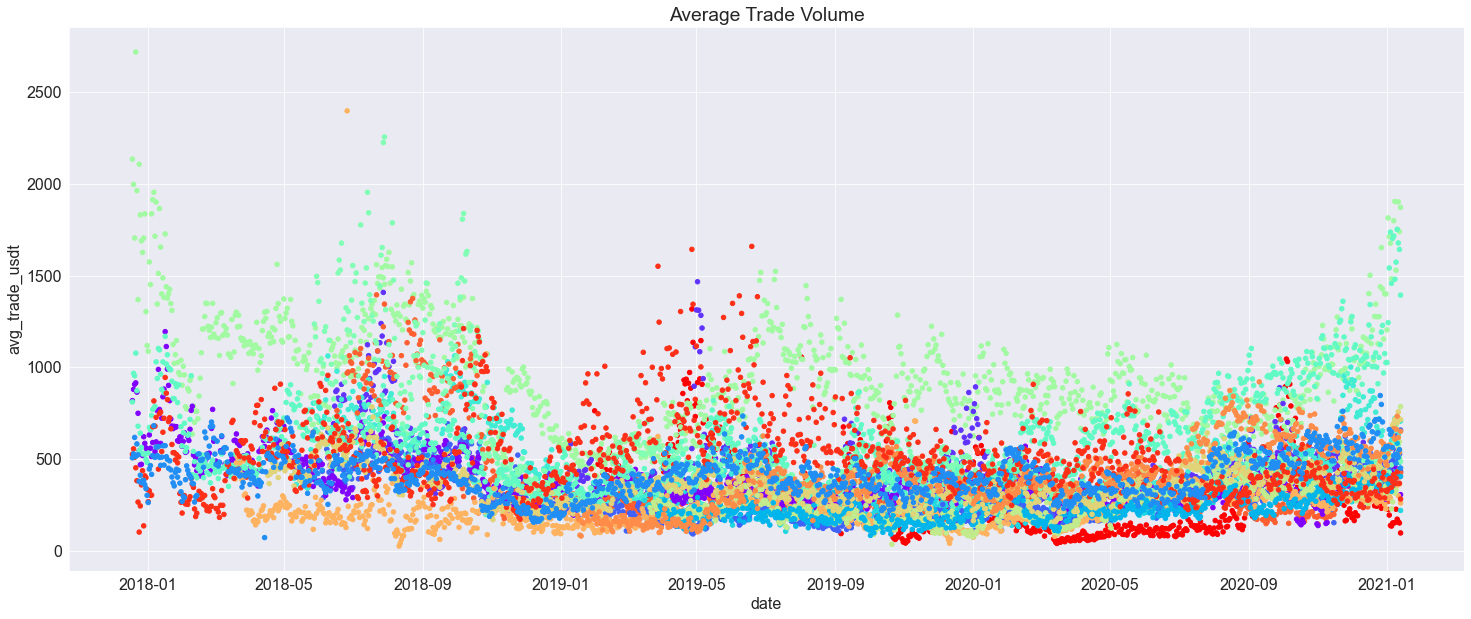

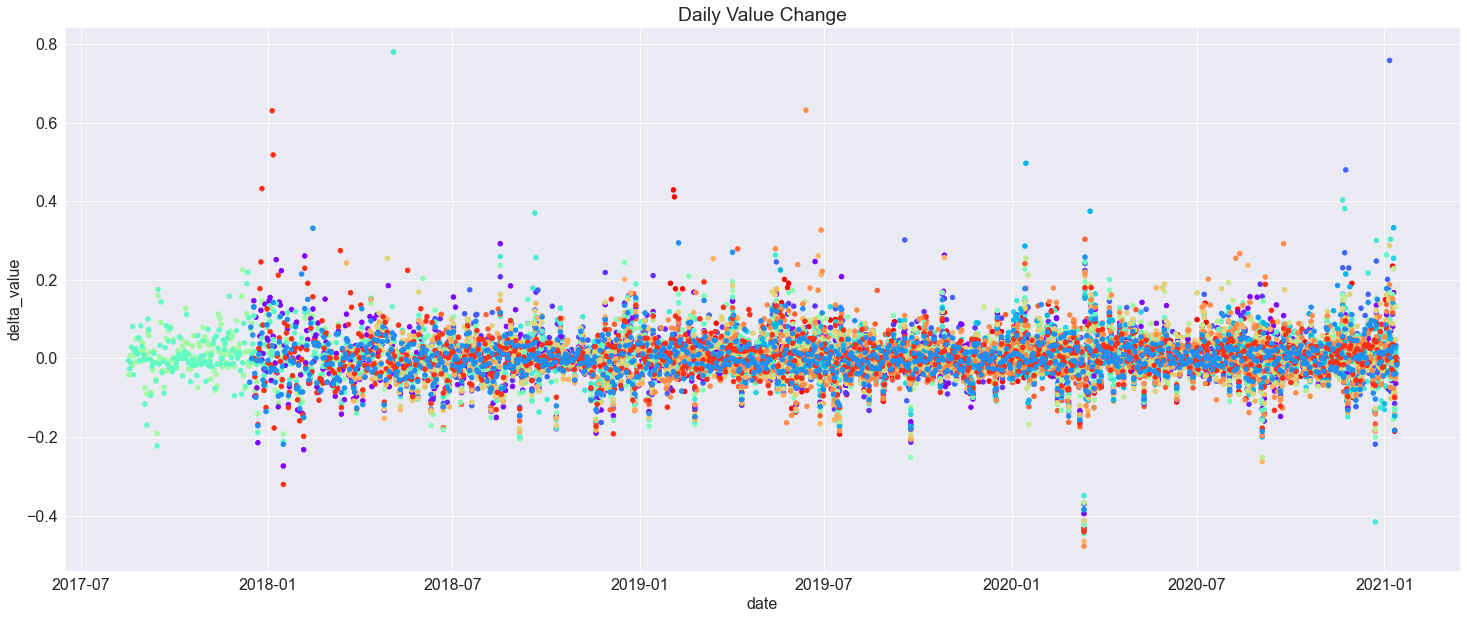

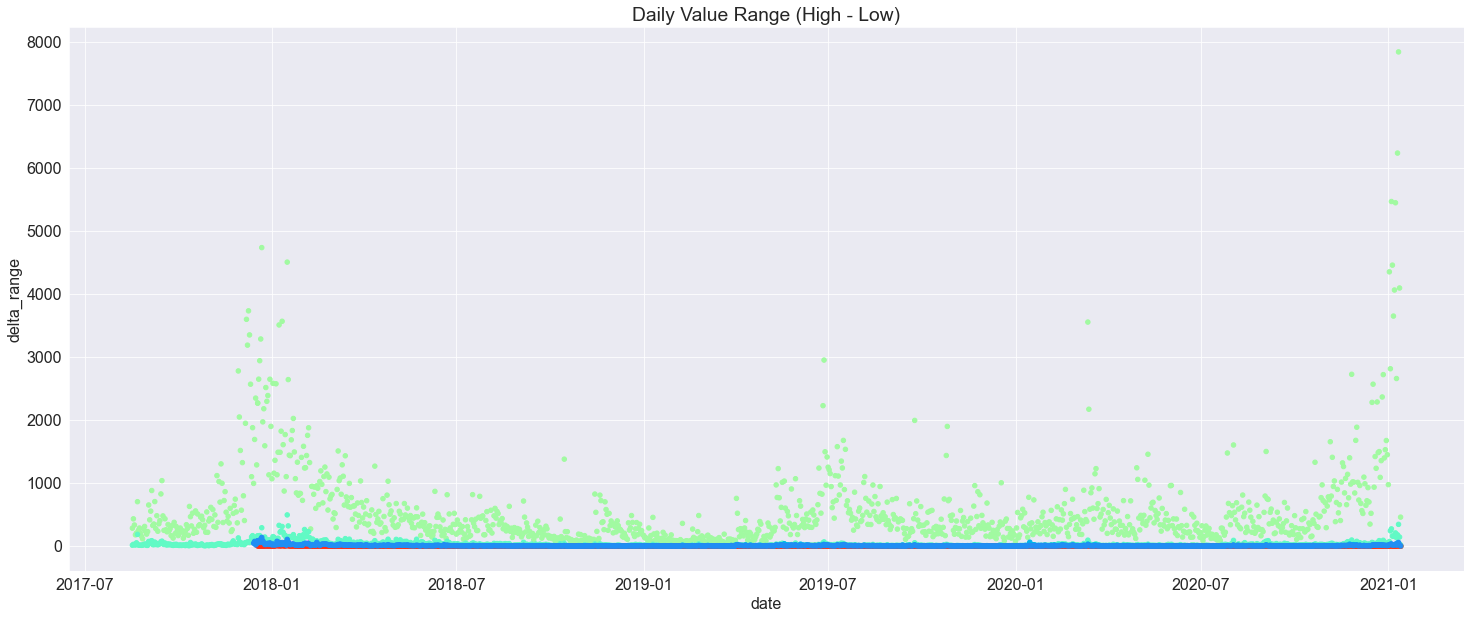

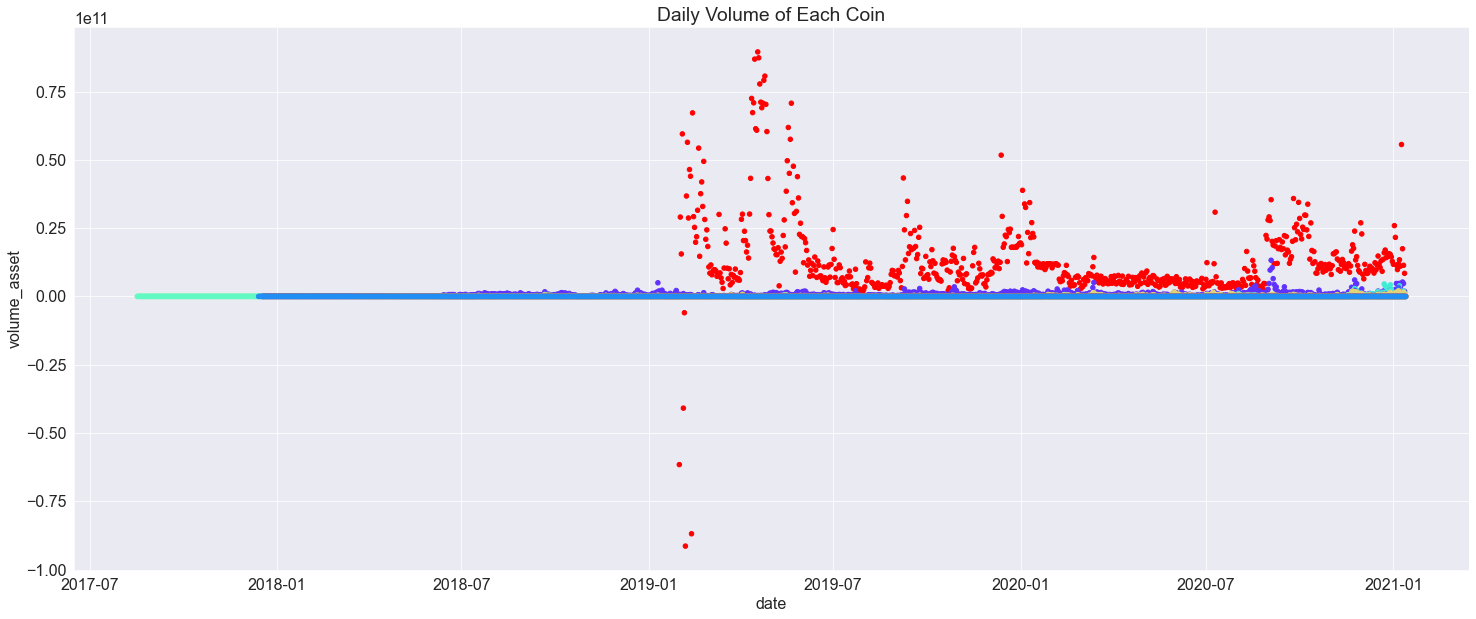

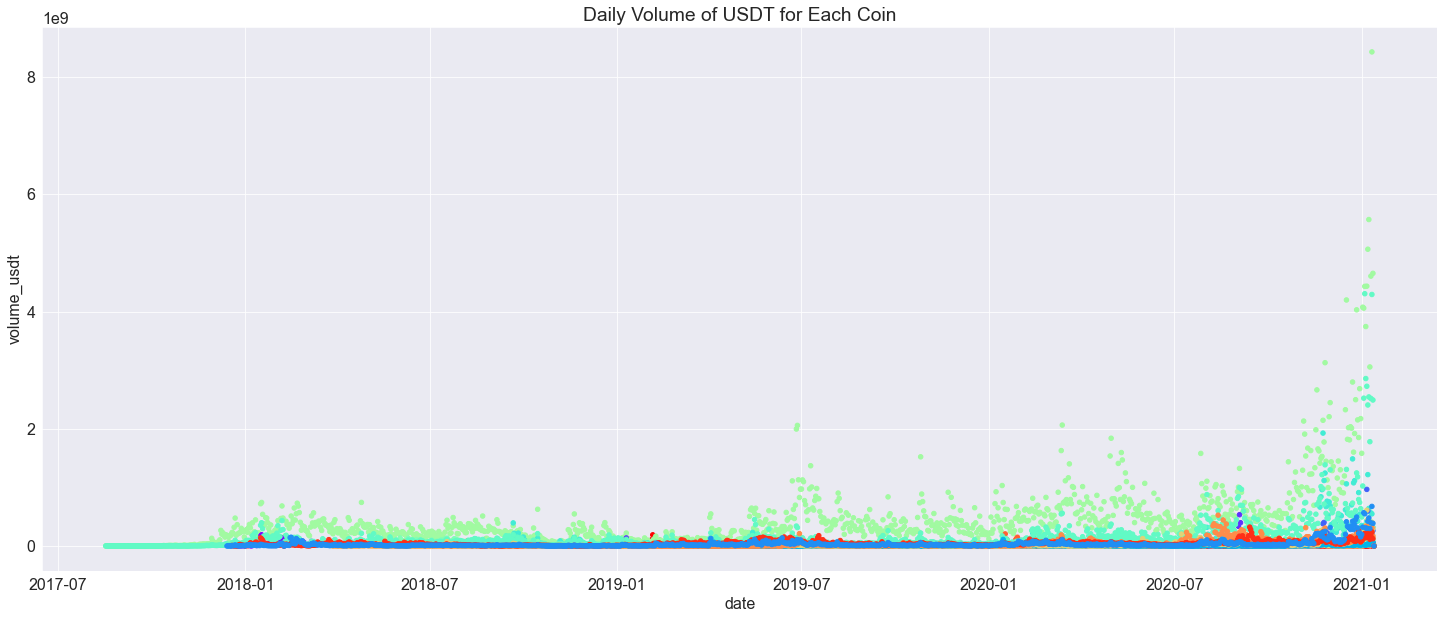

In [8]:
cdict = {}
coins = list(set(df["asset_coin"]))
cmap = cm.rainbow(np.linspace(0,1,len(coins)))
for i,c in zip(range(len(coins)),cmap):
    cdict[coins[i]] = c
df.plot(title="Average Trade Volume", kind="scatter", x="date", y="avg_trade_usdt", c=[cdict[i] for i in df["asset_coin"]], figsize=(25, 10))
df.plot(title="Daily Value Change", kind="scatter", x="date", y="delta_value", c=[cdict[i] for i in df["asset_coin"]], figsize=(25, 10))
df.plot(title="Daily Value Range (High - Low)", kind="scatter", x="date", y="delta_range", c=[cdict[i] for i in df["asset_coin"]], figsize=(25, 10))
df.plot(title="Daily Volume of Each Coin", kind="scatter", x="date", y="volume_asset", c=[cdict[i] for i in df["asset_coin"]], figsize=(25, 10))
df.plot.scatter(title="Daily Volume of USDT for Each Coin", x="date", y="volume_usdt", c=[cdict[i] for i in df["asset_coin"]], figsize=(25, 10))

<AxesSubplot:xlabel='Date', ylabel='Volume of USDT'>

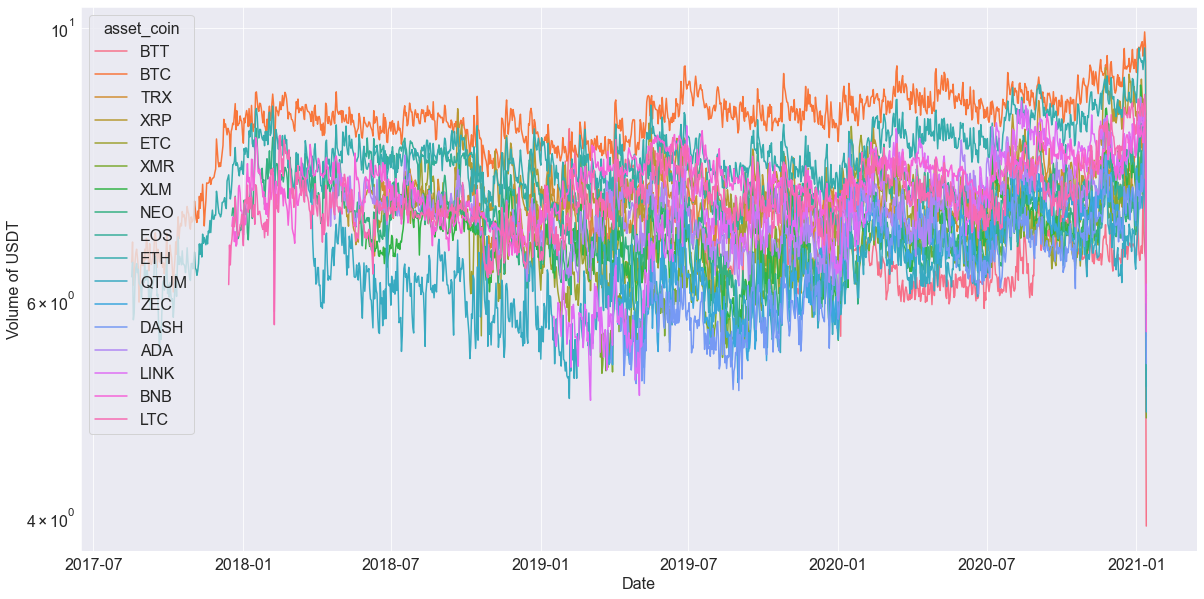

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_yscale("log")
ax.set_xlabel("Date")
ax.set_ylabel("Volume of USDT")
sns.lineplot(data=df, x="date", y="volume_usdt", hue="asset_coin")

# Analysis

## Research Questions

* After completing our EDA, we still have a few questions to answer:
    1. What coins do people favour?
    2. Have their been any odd market behaviours or outliers?
    3. How do different coin prices compare to each other?

### 1. What coins do people favour?

<AxesSubplot:title={'center':'Volume of USDT Going Into Each Coin'}, xlabel='Date', ylabel='Volume of USDT'>

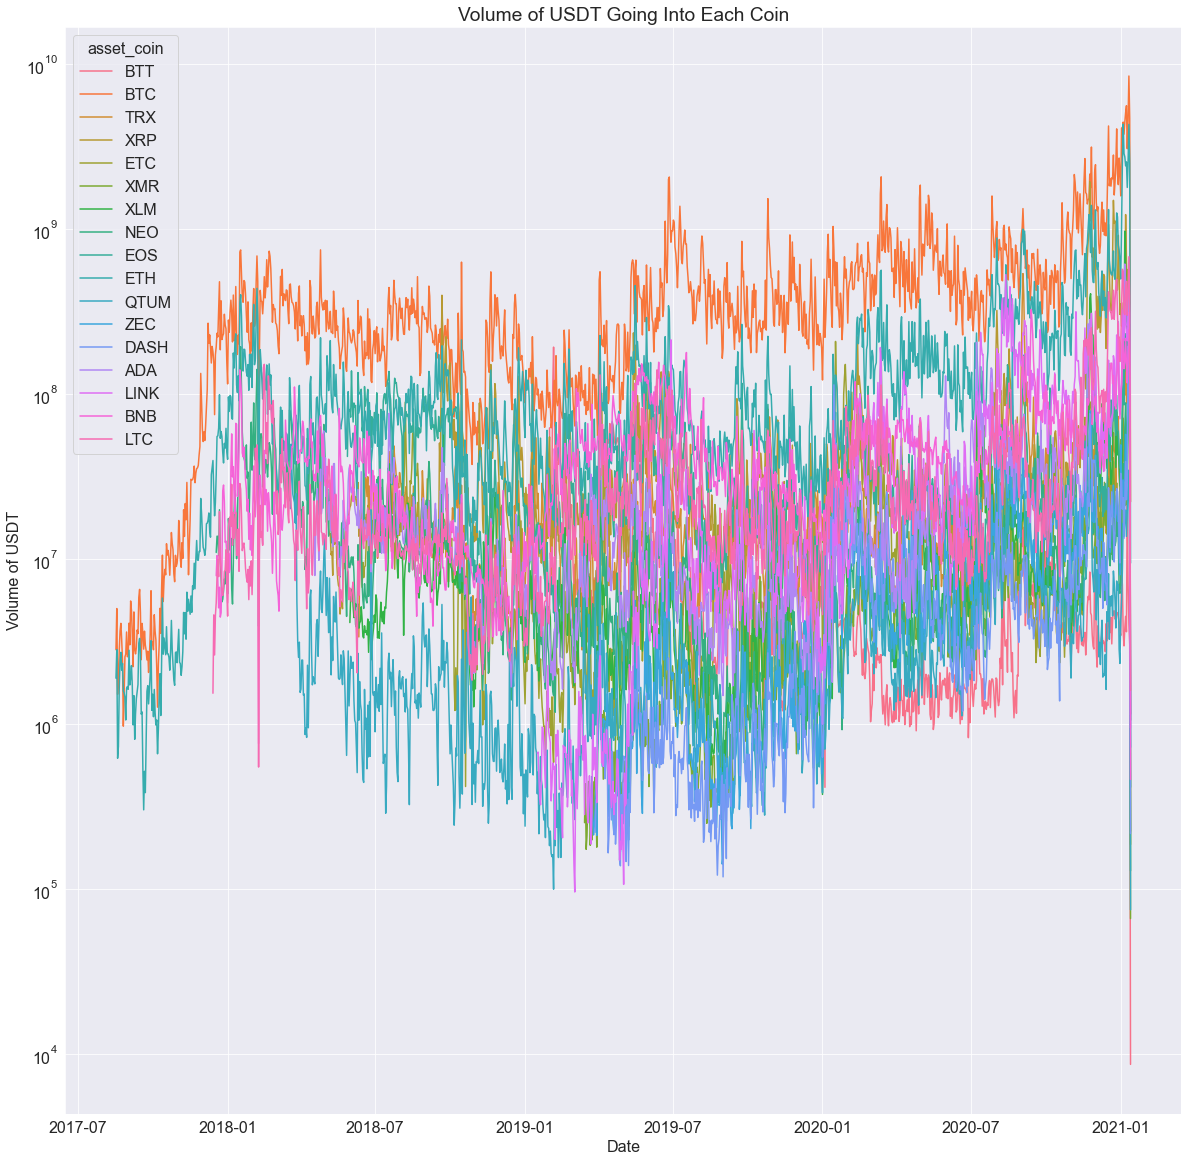

In [9]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_yscale("symlog")
ax.set_title("Volume of USDT Going Into Each Coin")
ax.set_xlabel("Date")
ax.set_ylabel("Volume of USDT")
sns.lineplot(data=df, x="date", y="volume_usdt", hue="asset_coin")

* Since each coin is it's own pairing with USDT he volume of USDT is the amount of USDT that has moved into that pool for that day. Since the prices of each coin is drastically different from each other. Plotting the USDT value is a much easier way to see the demand for each coin.
* The volume of usdt in each coin pairing changes drastically each day so it can be a little difficult to determine some of the information displayed however the one thing that is clear is that BTC remains at the top.

### 2. Have their been any odd market behaviours or outliers?

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


<AxesSubplot:xlabel='Date', ylabel='Price at Open'>

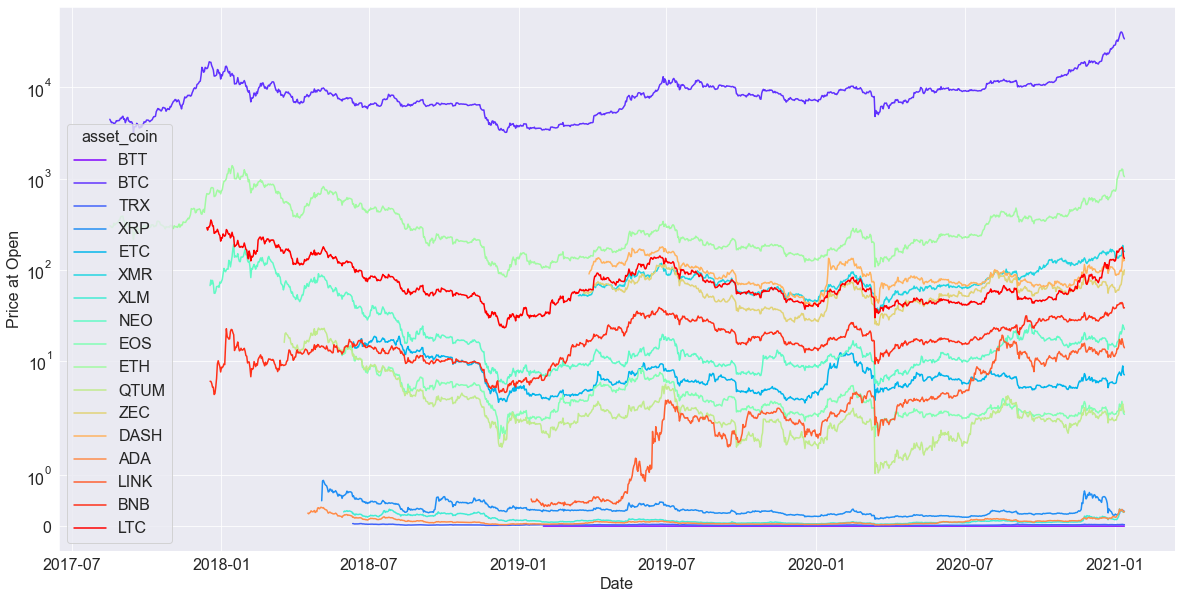

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_yscale("symlog")
ax.set_xlabel("Date")
ax.set_ylabel("Price at Open")
sns.lineplot(data=df, x="date", y="open", hue="asset_coin", palette=cmap)

* By plotting the open price of each coin over time we can see a few interesting things.
    * Bitcoin always stays at the top. Since the start of the data collection, BTC has always stayed at the top and no other coins come close to the price of bitcoin. Ethereum is the next to follow but still a ways behind. This makes sense given that bitcoin is the most popular cryptocurrency and most people instictfully think *bitcoin* when the word crypto-currency is mentioned. This social popularity is reflected in the price.
    * A majority of the changes in the market affect all coins. Other than the sharp uptick of LINK near 2019-07, all other noticable changes in the market are visible accross all coins. Larger priced coins aren't hit as hard (BTC) but if you look at the dips near the start of 2019 and the end of the first quarter in 2020 it's clear that each has been affected heavily.
    * The sharp dip in spring 2020 is clearly due to the economic affects of the COVID-19 pandemic.

### 3. How do different coin prices compare to each other?

* In the crypto-currency community it's very common to trade from one coin to another directly rather that going through a stablecoin like USDT showed in our data. Exchanges like [UniSwap](https://uniswap.org/), [SushiSwap](https://app.sushi.com/swap) and even Binance itself offer 'pools' of two coins where users can swap their coins for others. These pairs are most popular among decentalized exchanges since each transaction costs a fee and the less transactions the better. Pairs are notated as BTC/ETH, ADA/BTC, etc...
* Our data doesn't have these pairings, however, if we assume the markets have a high liquidity we can estimate the prices of a given pool by comparing their market prices at open. Since all prices are against USDT, we can use simple ratios to plot prices as COIN_1/COIN_2
* Since there are n^2 possible markets, for our example we will keep it simple and stick to 3 plots. Each plot depicting one of the following markets: ETH/BTC, ADA/ETH and BNB/BTC

In [9]:
### Create pair data ###
def gen_market_pair(coin_1, coin_2):
    coin_1_frame = pd.DataFrame(df[df["asset_coin"] == coin_1], columns=["date", "open"])
    coin_2_frame = pd.DataFrame(df[df["asset_coin"] == coin_2], columns=["date", "open"])
    market = pd.merge(coin_1_frame, coin_2_frame, on="date")
    market = market.assign(
        price = lambda x: x["open_x"] / x["open_y"]
    ).drop(columns=["open_x", "open_y"])
    return market
    
eth_btc = gen_market_pair("ETH", "BTC")
ada_eth = gen_market_pair("ADA", "ETH")
bnb_btc = gen_market_pair("BNB", "BTC")

<AxesSubplot:title={'center':'BNB/BTC'}, xlabel='Date', ylabel='Price at Open'>

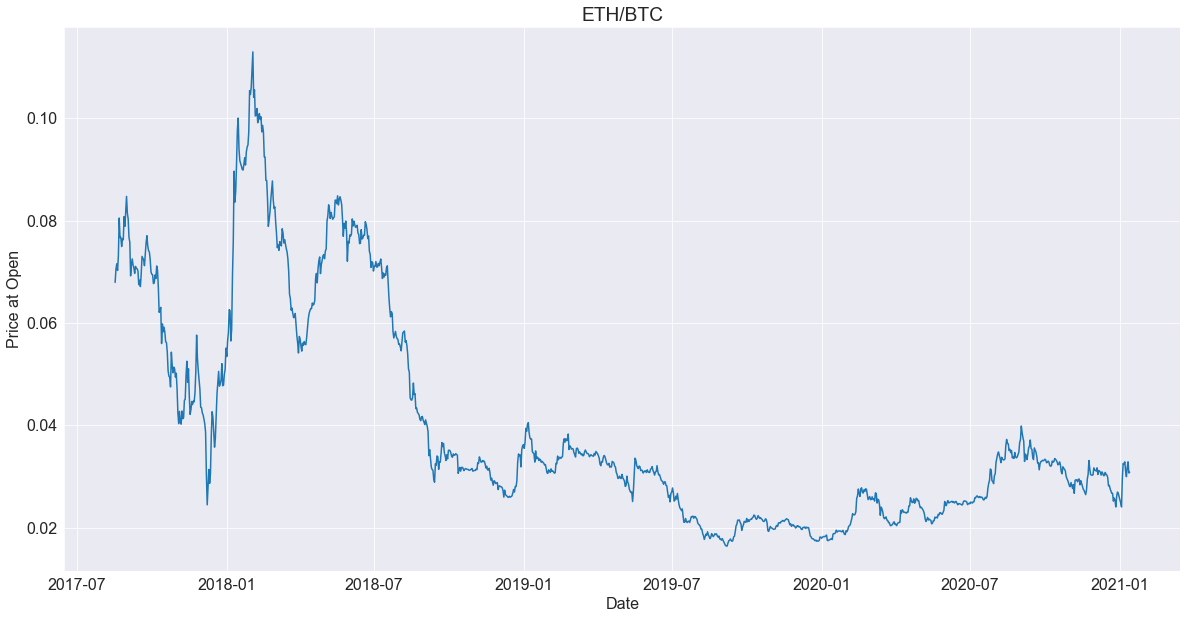

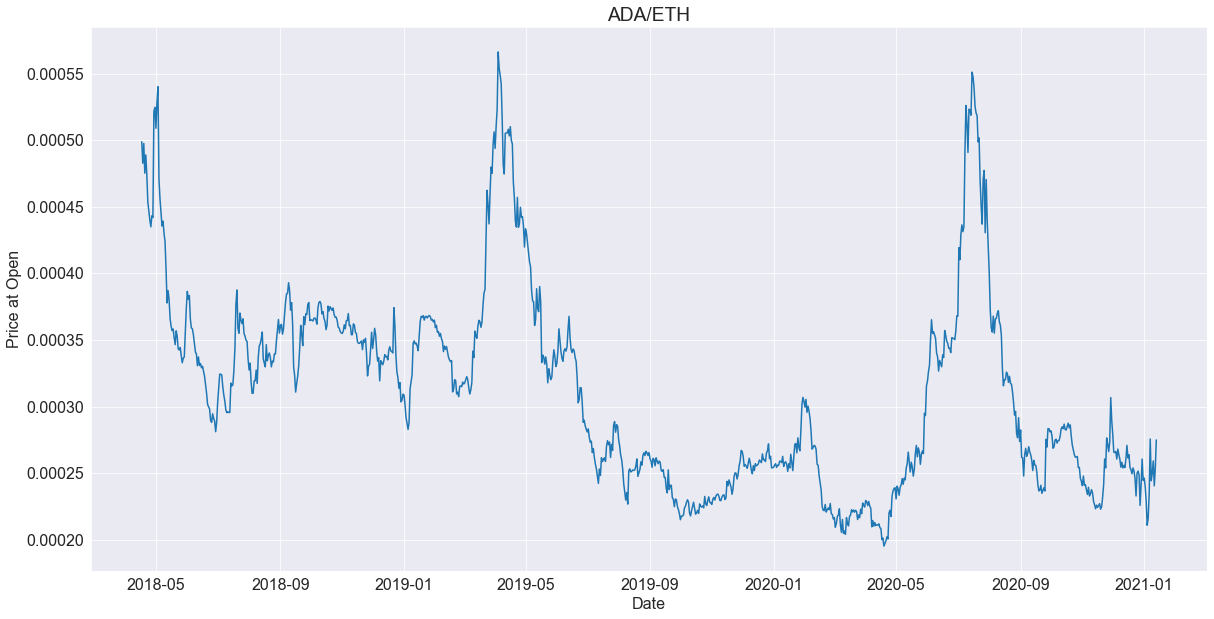

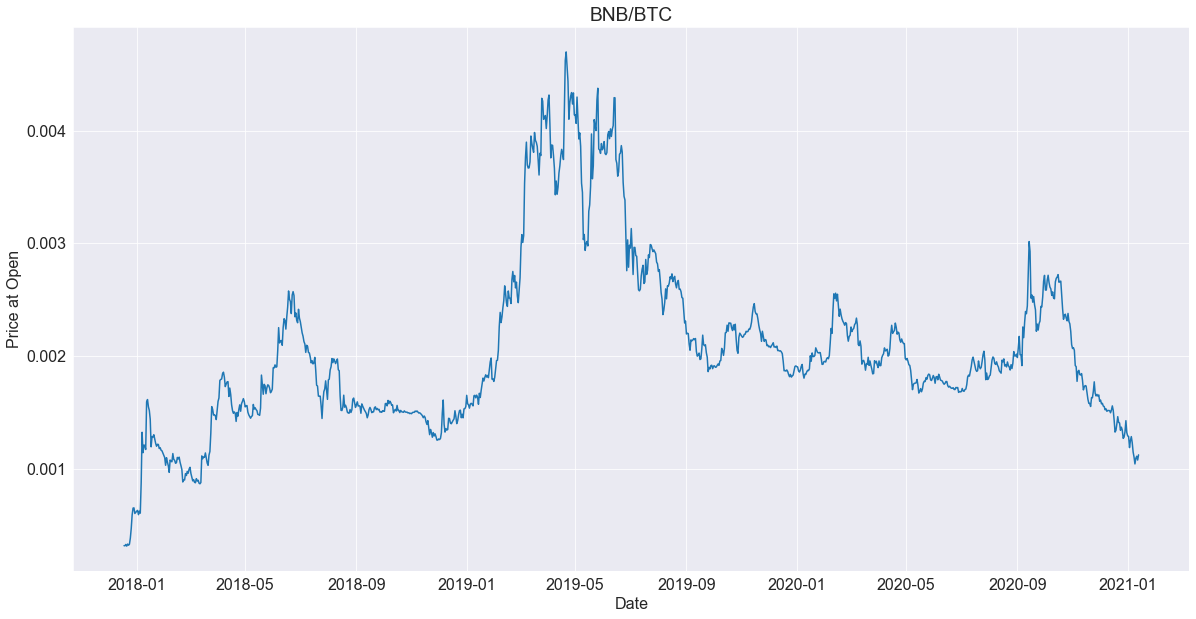

In [10]:
### Plot Charts ###
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title("ETH/BTC")
ax.set_yscale("linear")
ax.set_xlabel("Date")
ax.set_ylabel("Price at Open")
sns.lineplot(data=eth_btc, x="date", y="price")
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title("ADA/ETH")
ax.set_yscale("linear")
ax.set_xlabel("Date")
ax.set_ylabel("Price at Open")
sns.lineplot(data=ada_eth, x="date", y="price")
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title("BNB/BTC")
ax.set_yscale("linear")
ax.set_xlabel("Date")
ax.set_ylabel("Price at Open")
sns.lineplot(data=bnb_btc, x="date", y="price")

If we compare these to the charts from binance, we can see that they are almost identical:
* ETH/BTC ![](../images/ETHBTC.png)
* ADA/ETH ![](../images/ADAETH.png)
* BNB/BTC ![](../images/BNBBTC.png)

* This confirms that we can estimate coin-to-coin markets by combining multiple coin-to-usd markets.

* The number of factors that cause differences between coin prices is inumerable however one key take-away we can gather from the first chart is that the price differences between ETH and BTC are becoming more stable. This is to be expected as ETH has become the second biggest name in crypto-currency and given that they have similar reputations, any changes to one coin usually affect the other as well.